In [3]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# 필요 라이브러리 호출
import numpy
import tensorflow as tf

# 데이터 셋 호출
from keras.datasets import mnist

# 실행 시마다 같은 결과값 도출을 위한 시드 설정
numpy.random.seed(0)
tf.random.set_seed(0)

# 데이터를 불러와서 각 변수에 저장
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 학습에 적합한 형태로 데이터 가공
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 클래스를 학습에 이용하기 위해 데이터 가공
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 딥러닝 모델 구조 설정(2개층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, relu와 softmax 활성화 함수 이용)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 딥러닝 구조 설정(loss 옵션을 다중 클래스에 적합한 categorical_crossentropy, 옵티마이저는 adam 설정)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 모델 실행(X_test, Y_test로 검증, 200개씩 30번 학습)
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=2)

# 학습 정확도, 검증 정확도 출력
print('\nAccuracy: {:.4f}'.format(model.evaluate(X_train, Y_train)[1]))
print('\nVal_Accuracy: {:.4f}'.format(model.evaluate(X_test, Y_test)[1]))

# 모델 저장
model.save('Predict_Model.h5')

Epoch 1/30
300/300 - 1s - loss: 0.3043 - accuracy: 0.9151 - val_loss: 0.1529 - val_accuracy: 0.9576 - 1s/epoch - 5ms/step
Epoch 2/30
300/300 - 1s - loss: 0.1263 - accuracy: 0.9634 - val_loss: 0.1052 - val_accuracy: 0.9689 - 1s/epoch - 3ms/step
Epoch 3/30
300/300 - 1s - loss: 0.0827 - accuracy: 0.9760 - val_loss: 0.0817 - val_accuracy: 0.9750 - 952ms/epoch - 3ms/step
Epoch 4/30
300/300 - 1s - loss: 0.0599 - accuracy: 0.9825 - val_loss: 0.0756 - val_accuracy: 0.9765 - 974ms/epoch - 3ms/step
Epoch 5/30
300/300 - 1s - loss: 0.0465 - accuracy: 0.9865 - val_loss: 0.0677 - val_accuracy: 0.9793 - 1s/epoch - 3ms/step
Epoch 6/30
300/300 - 1s - loss: 0.0350 - accuracy: 0.9901 - val_loss: 0.0669 - val_accuracy: 0.9791 - 909ms/epoch - 3ms/step
Epoch 7/30
300/300 - 1s - loss: 0.0263 - accuracy: 0.9932 - val_loss: 0.0608 - val_accuracy: 0.9816 - 936ms/epoch - 3ms/step
Epoch 8/30
300/300 - 1s - loss: 0.0206 - accuracy: 0.9950 - val_loss: 0.0638 - val_accuracy: 0.9801 - 924ms/epoch - 3ms/step
Epoch 9/3

1/1 [==============================] - 0s 27ms/step


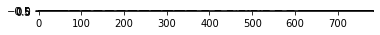

6


In [4]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt
# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# test.png는 그림판에서 붓으로 숫자 8을 그린 이미지 파일
# test.png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("승휘3.png").convert("L")

# 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# 데이터를 모델에 적용할 수 있도록 가공
test_data = ((np.array(img) / 255) - 1) * -1

# 모델 불러오기
model = load_model('Predict_Model.h5')

# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
# res = model.predict_classes(test_data)
# 2021/10/02 수정 - 오류시 아래 명령어로 대체 가능합니다.
res =(model.predict(test_data) > 0.5).astype("int32")

lis2 =list(*res)

# print(lis2)
# 넘파이의 최대 색인값 
plt.imshow(test_images[0], cmap='Greys')
plt.show()

print(np.argmax(*res))

# for i in range(len(lis2)):
#     if lis2[i] == 1 :
#         print(i)
# print(res)